In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Severity'].sum()
        print(f"Sum of Severity for {user} and {counter_party}: {result}")

Sum of Severity for Y2011 and January: 7182
Sum of Severity for Y2011 and February: 7014
Sum of Severity for Y2011 and March: 8100
Sum of Severity for Y2011 and April: 8106
Sum of Severity for Y2011 and May: 7806
Sum of Severity for Y2011 and June: 7140
Sum of Severity for Y2011 and July: 7227
Sum of Severity for Y2011 and August: 7398
Sum of Severity for Y2011 and September: 7755
Sum of Severity for Y2011 and October: 7812
Sum of Severity for Y2011 and November: 8271
Sum of Severity for Y2011 and December: 8292
Sum of Severity for Y2012 and January: 7344
Sum of Severity for Y2012 and February: 7503
Sum of Severity for Y2012 and March: 7944
Sum of Severity for Y2012 and April: 8250
Sum of Severity for Y2012 and May: 8286
Sum of Severity for Y2012 and June: 7272
Sum of Severity for Y2012 and July: 6942
Sum of Severity for Y2012 and August: 7098
Sum of Severity for Y2012 and September: 6999
Sum of Severity for Y2012 and October: 8385
Sum of Severity for Y2012 and November: 7965
Sum of Se

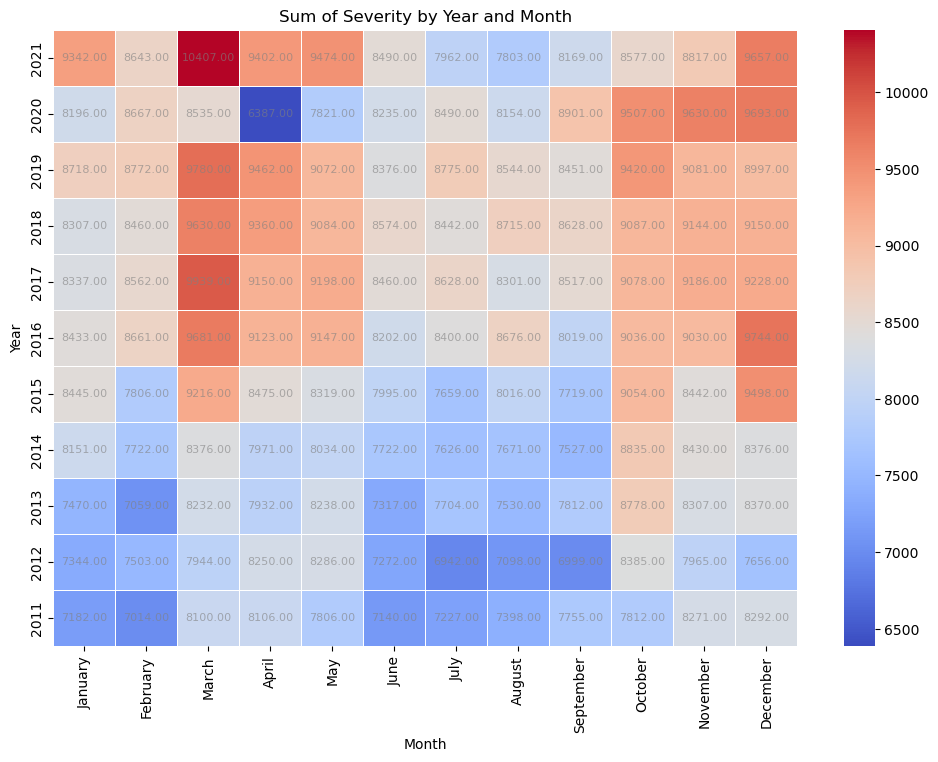

In [8]:

data = {
    "2011": [7182, 7014, 8100, 8106, 7806, 7140, 7227, 7398, 7755, 7812, 8271, 8292],
    "2012": [7344, 7503, 7944, 8250, 8286, 7272, 6942, 7098, 6999, 8385, 7965, 7656],
    "2013": [7470, 7059, 8232, 7932, 8238, 7317, 7704, 7530, 7812, 8778, 8307, 8370],
    "2014": [8151, 7722, 8376, 7971, 8034, 7722, 7626, 7671, 7527, 8835, 8430, 8376],
    "2015": [8445, 7806, 9216, 8475, 8319, 7995, 7659, 8016, 7719, 9054, 8442, 9498],
    "2016": [8433, 8661, 9681, 9123, 9147, 8202, 8400, 8676, 8019, 9036, 9030, 9744],
    "2017": [8337, 8562, 9939, 9150, 9198, 8460, 8628, 8301, 8517, 9078, 9186, 9228],
    "2018": [8307, 8460, 9630, 9360, 9084, 8574, 8442, 8715, 8628, 9087, 9144, 9150],
    "2019": [8718, 8772, 9780, 9462, 9072, 8376, 8775, 8544, 8451, 9420, 9081, 8997],
    "2020": [8196, 8667, 8535, 6387, 7821, 8235, 8490, 8154, 8901, 9507, 9630, 9693],
    "2021": [9342, 8643, 10407, 9402, 9474, 8490, 7962, 7803, 8169, 8577, 8817, 9657]
}

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df = pd.DataFrame(data, index=months)

df = df.T

df = df.iloc[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Sum of Severity by Year and Month')

plt.show()


In [3]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Severity'].mean()
        print(f"mean of Severity for {user} and {counter_party}: {result}")

mean of Severity for Y2011 and January: 18.654545454545456
mean of Severity for Y2011 and February: 18.17098445595855
mean of Severity for Y2011 and March: 19.612590799031477
mean of Severity for Y2011 and April: 20.625954198473284
mean of Severity for Y2011 and May: 18.809638554216868
mean of Severity for Y2011 and June: 18.59375
mean of Severity for Y2011 and July: 19.532432432432433
mean of Severity for Y2011 and August: 18.96923076923077
mean of Severity for Y2011 and September: 19.732824427480917
mean of Severity for Y2011 and October: 19.87786259541985
mean of Severity for Y2011 and November: 20.124087591240876
mean of Severity for Y2011 and December: 20.62686567164179
mean of Severity for Y2012 and January: 18.782608695652176
mean of Severity for Y2012 and February: 19.5390625
mean of Severity for Y2012 and March: 19.959798994974875
mean of Severity for Y2012 and April: 20.320197044334975
mean of Severity for Y2012 and May: 21.691099476439792
mean of Severity for Y2012 and June:

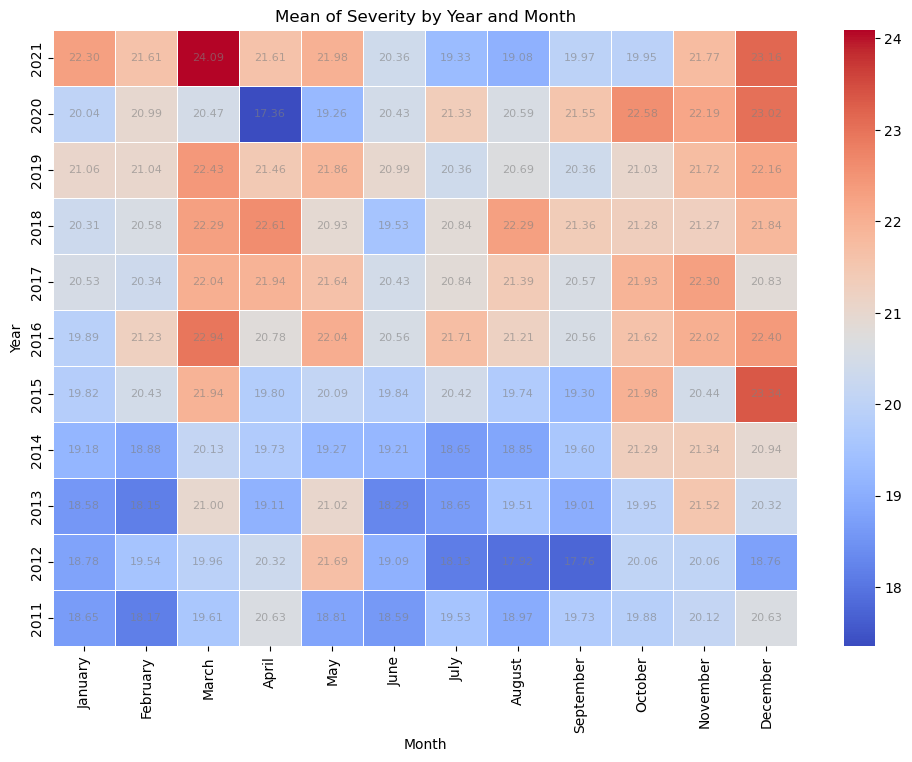

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# داده‌ها
mean_data = {
    "2011": [18.654545454545456, 18.17098445595855, 19.612590799031477, 20.625954198473284, 18.809638554216868, 18.59375, 19.532432432432433, 18.96923076923077, 19.732824427480917, 19.87786259541985, 20.124087591240876, 20.62686567164179],
    "2012": [18.782608695652176, 19.5390625, 19.959798994974875, 20.320197044334975, 21.691099476439792, 19.086614173228348, 18.12532637075718, 17.924242424242426, 17.763959390862944, 20.059808612440193, 20.062972292191436, 18.764705882352942],
    "2013": [18.582089552238806, 18.146529562982003, 21.0, 19.113253012048194, 21.01530612244898, 18.2925, 18.653753026634384, 19.507772020725387, 19.00729927007299, 19.95, 21.520725388601036, 20.315533980582526],
    "2014": [19.178823529411765, 18.880195599022006, 20.134615384615383, 19.730198019801982, 19.26618705035971, 19.208955223880597, 18.64547677261614, 18.847665847665848, 19.6015625, 21.289156626506024, 21.341772151898734, 20.94],
    "2015": [19.823943661971832, 20.43455497382199, 21.942857142857143, 19.80140186915888, 20.094202898550726, 19.838709677419356, 20.424, 19.74384236453202, 19.2975, 21.975728155339805, 20.440677966101696, 23.336609336609335],
    "2016": [19.889150943396228, 21.227941176470587, 22.94075829383886, 20.78132118451025, 22.040963855421687, 20.55639097744361, 21.705426356589147, 21.21271393643032, 20.56153846153846, 21.617224880382775, 22.024390243902438, 22.4],
    "2017": [20.53448275862069, 20.33729216152019, 22.03769401330377, 21.942446043165468, 21.64235294117647, 20.434782608695652, 20.840579710144926, 21.394329896907216, 20.57246376811594, 21.92753623188406, 22.296116504854368, 20.830699774266364],
    "2018": [20.31051344743276, 20.583941605839417, 22.291666666666668, 22.608695652173914, 20.930875576036865, 19.530751708428244, 20.844444444444445, 22.28900255754476, 21.356435643564357, 21.28103044496487, 21.26511627906977, 21.837708830548927],
    "2019": [21.057971014492754, 21.035971223021583, 22.431192660550458, 21.45578231292517, 21.86024096385542, 20.992481203007518, 20.359628770301626, 20.687651331719128, 20.363855421686747, 21.026785714285715, 21.72488038277512, 22.160098522167488],
    "2020": [20.03911980440098, 20.98547215496368, 20.467625899280577, 17.355978260869566, 19.263546798029555, 20.43424317617866, 21.331658291457288, 20.59090909090909, 21.552058111380145, 22.581947743467932, 22.1889400921659, 23.02375296912114],
    "2021": [22.295942720763723, 21.6075, 24.09027777777778, 21.613793103448277, 21.981438515081205, 20.359712230215827, 19.325242718446603, 19.078239608801955, 19.973105134474327, 19.946511627906975, 21.77037037037037, 23.158273381294965]
}

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_mean = pd.DataFrame(mean_data, index=months)

df_mean = df_mean.T

df_mean = df_mean.iloc[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df_mean, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Mean of Severity by Year and Month')

plt.show()


# Beddaystoocc

In [3]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['BeddystoCC'].sum()
        print(f"Sum of BeddystoCC for {user} and {counter_party}: {result}")

Sum of BeddystoCC for Y2011 and January: 2035.304131855
Sum of BeddystoCC for Y2011 and February: 2161.575569518
Sum of BeddystoCC for Y2011 and March: 2010.1873722750001
Sum of BeddystoCC for Y2011 and April: 2073.153404145
Sum of BeddystoCC for Y2011 and May: 2328.27686207
Sum of BeddystoCC for Y2011 and June: 2694.201988037
Sum of BeddystoCC for Y2011 and July: 1729.802232422
Sum of BeddystoCC for Y2011 and August: 2139.065659517
Sum of BeddystoCC for Y2011 and September: 2082.791114677
Sum of BeddystoCC for Y2011 and October: 1984.014462956
Sum of BeddystoCC for Y2011 and November: 2024.767511832
Sum of BeddystoCC for Y2011 and December: 1744.0451837599999
Sum of BeddystoCC for Y2012 and January: 1976.090318157
Sum of BeddystoCC for Y2012 and February: 1962.8659096409997
Sum of BeddystoCC for Y2012 and March: 1731.960262097
Sum of BeddystoCC for Y2012 and April: 1748.448893445
Sum of BeddystoCC for Y2012 and May: 2185.369097315
Sum of BeddystoCC for Y2012 and June: 1808.752834428
S

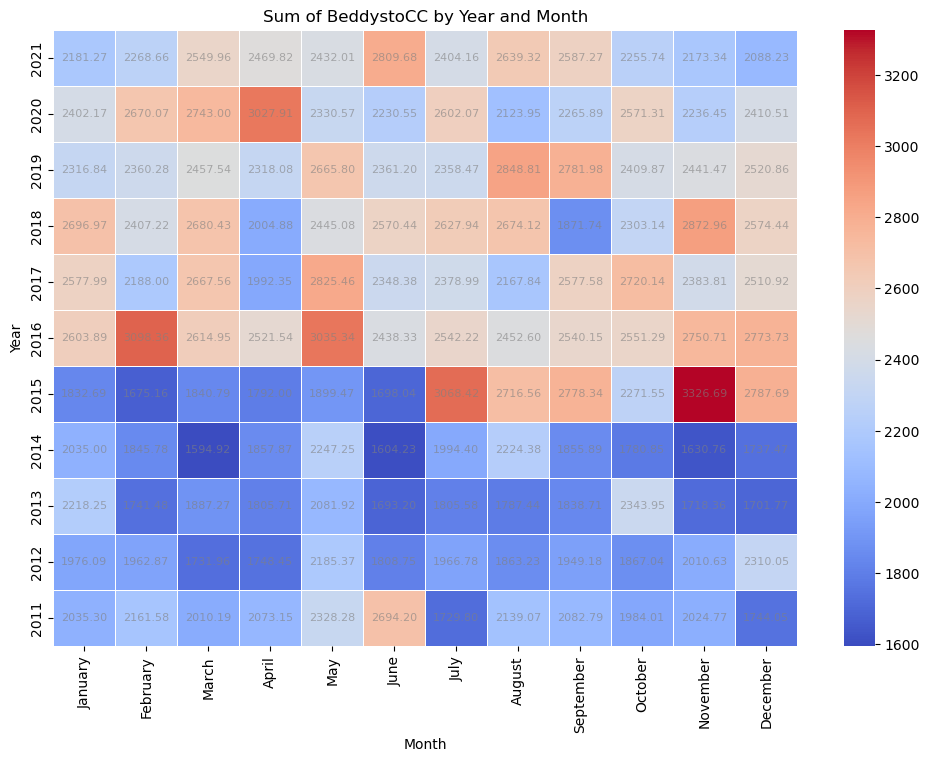

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

beddystoCC_data = {
    "2011": [2035.304131855, 2161.575569518, 2010.1873722750001, 2073.153404145, 2328.27686207, 2694.201988037, 1729.802232422, 2139.065659517, 2082.791114677, 1984.014462956, 2024.767511832, 1744.0451837599999],
    "2012": [1976.090318157, 1962.8659096409997, 1731.960262097, 1748.448893445, 2185.369097315, 1808.752834428, 1966.780428002, 1863.226390406, 1949.1835788, 1867.038485312, 2010.6272876420003, 2310.053438002],
    "2013": [2218.249514168, 1741.480093308, 1887.268212184, 1805.713293946, 2081.9233845950002, 1693.197468198, 1805.583774658, 1787.440975719, 1838.7146275129999, 2343.950819193, 1718.3617935450002, 1701.767594912],
    "2014": [2034.997899817, 1845.779183898, 1594.915560382, 1857.865635294, 2247.254346453, 1604.2277894079998, 1994.396641852, 2224.377524249, 1855.890541574, 1780.852279756, 1630.758424226, 1737.466847908],
    "2015": [1832.693169117, 1675.1638474850001, 1840.794046423, 1791.9964936650001, 1899.472335465, 1698.0402094329997, 3068.417362862, 2716.560254516, 2778.335771207, 2271.5465483030002, 3326.694806577, 2787.692853492],
    "2016": [2603.890265302, 3098.358429182, 2614.9547239549997, 2521.5405298819996, 3035.343405292, 2438.331195187, 2542.216537366, 2452.595345691, 2540.146024178, 2551.285086242, 2750.707495576, 2773.732725062],
    "2017": [2577.991439504, 2188.004467897, 2667.557369416, 1992.345133835, 2825.460499312, 2348.37795435, 2378.99380313, 2167.8412585220003, 2577.577405567, 2720.144421456, 2383.8050740549997, 2510.920722505],
    "2018": [2696.9686358729996, 2407.220871712, 2680.42948169, 2004.883723448, 2445.075901823, 2570.44311146, 2627.939677337, 2674.116335952, 1871.744357295, 2303.138416676, 2872.9559848110002, 2574.4426356120002],
    "2019": [2316.836198597, 2360.2837440209996, 2457.5406216069996, 2318.0774301049996, 2665.7993189569997, 2361.202820257, 2358.474983219, 2848.814765487, 2781.977775837, 2409.872449796, 2441.4712004499997, 2520.855714481],
    "2020": [2402.173762388, 2670.069641088, 2743.000045126, 3027.90501807, 2330.5683577219997, 2230.546571862, 2602.069927473, 2123.9514940930003, 2265.8876051919997, 2571.3098991750003, 2236.448663075, 2410.507663903],
    "2021": [2181.27029255, 2268.66170859, 2549.959881339, 2469.820475605, 2432.0123392759997, 2809.6825965850003, 2404.164404242, 2639.321807603, 2587.268233697, 2255.735717121, 2173.336997095, 2088.2306028760004]
}

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_beddystoCC = pd.DataFrame(beddystoCC_data, index=months)

df_beddystoCC = df_beddystoCC.T

df_beddystoCC = df_beddystoCC.iloc[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df_beddystoCC, annot=True, fmt='.2f', cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Sum of BeddystoCC by Year and Month')

plt.show()


In [9]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['BeddystoCC'].mean()
        print(f"mean of BeddystoCC for {user} and {counter_party}: {result}")

mean of BeddystoCC for Y2011 and January: 5.286504238584416
mean of BeddystoCC for Y2011 and February: 5.599936708595855
mean of BeddystoCC for Y2011 and March: 4.867281773062955
mean of BeddystoCC for Y2011 and April: 5.2751995016412225
mean of BeddystoCC for Y2011 and May: 5.610305691734941
mean of BeddystoCC for Y2011 and June: 7.0161510105130205
mean of BeddystoCC for Y2011 and July: 4.675141168708108
mean of BeddystoCC for Y2011 and August: 5.484783742351283
mean of BeddystoCC for Y2011 and September: 5.299722938109415
mean of BeddystoCC for Y2011 and October: 5.048382857394402
mean of BeddystoCC for Y2011 and November: 4.9264416346277375
mean of BeddystoCC for Y2011 and December: 4.338420855124379
mean of BeddystoCC for Y2012 and January: 5.053939432626597
mean of BeddystoCC for Y2012 and February: 5.111629973023438
mean of BeddystoCC for Y2012 and March: 4.351658949992463
mean of BeddystoCC for Y2012 and April: 4.306524368091134
mean of BeddystoCC for Y2012 and May: 5.7208615112

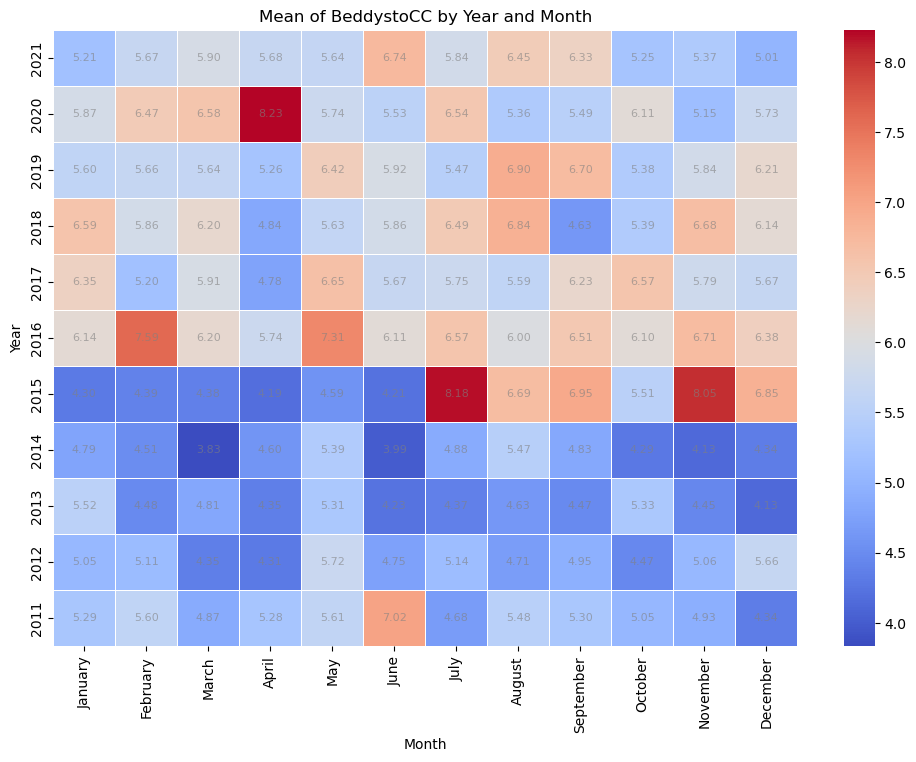

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

beddystoCC_mean_data = {
    "2011": [5.286504238584416, 5.599936708595855, 4.867281773062955, 5.2751995016412225, 5.610305691734941, 7.0161510105130205, 4.675141168708108, 5.484783742351283, 5.299722938109415, 5.048382857394402, 4.9264416346277375, 4.338420855124379],
    "2012": [5.053939432626597, 5.111629973023438, 4.351658949992463, 4.306524368091134, 5.720861511295812, 4.747382767527559, 5.135196939953001, 4.705117147489899, 4.947166443654821, 4.466599247157895, 5.064552361818641, 5.661895681377451],
    "2013": [5.5180336173333355, 4.476812579197944, 4.8144597249591845, 4.351116370954216, 5.311029042334185, 4.232993670495, 4.371873546387409, 4.6306761028989625, 4.473758217793187, 5.327160952711363, 4.451714491049222, 4.130503871145631],
    "2014": [4.788230352510588, 4.512907540092909, 3.8339316355336526, 4.598677315084158, 5.3890991521654685, 3.9906163915621895, 4.8762754079511, 5.465301042380836, 4.833048285348958, 4.291210312665061, 4.128502339812659, 4.34366711977],
    "2015": [4.302096641119719, 4.385245674044503, 4.382842967673809, 4.186907695478972, 4.588097428659421, 4.213499278990073, 8.182446300965333, 6.69103510964532, 6.9458394280175, 5.513462495881068, 8.054951105513316, 6.849368190398034],
    "2016": [6.1412506257122645, 7.594015757799019, 6.196575175248816, 5.743828086291573, 7.3140804946795175, 6.111105752348371, 6.569034980273903, 5.996565637386306, 6.513194933789743, 6.103552837899522, 6.709042672136585, 6.376397069108046],
    "2017": [6.349732609615763, 5.19716025628741, 5.91476135125499, 4.777806076342925, 6.648142351322351, 5.672410517753622, 5.746361843309178, 5.587219738458763, 6.226032380596618, 6.570397153275362, 5.785934645764563, 5.667992601591423],
    "2018": [6.594055344432764, 5.856985089323603, 6.204697874282406, 4.842714307845411, 5.63381544198848, 5.855223488519362, 6.488739944041975, 6.839172214710998, 4.633030587363859, 5.393766783784542, 6.681292987932559, 6.144254500267303],
    "2019": [5.59622270192512, 5.66015286335971, 5.636561058731653, 5.256411406133787, 6.423612816763852, 5.917801554528821, 5.472099729046404, 6.8978565750290555, 6.703560905631326, 5.379179575437498, 5.840840192464114, 6.209004222859607],
    "2020": [5.873285482611247, 6.465059663651334, 6.577937758095922, 8.228002766494564, 5.740316152024632, 5.5348550170272945, 6.537864139379397, 5.363513873972222, 5.4864106663244545, 6.107624463598573, 5.153107518605991, 5.725671410695962],
    "2021": [5.2058956862768495, 5.671654271475001, 5.902684910506945, 5.67774821978161, 5.642720044723897, 6.737847953441246, 5.8353504957330085, 6.453109554041564, 6.325839202193154, 5.245897016560464, 5.366264190358025, 5.007747249103116]
}

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_beddystoCC_mean = pd.DataFrame(beddystoCC_mean_data, index=months).T

df_beddystoCC_mean = df_beddystoCC_mean.iloc[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df_beddystoCC_mean, annot=True, fmt='.2f', cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Mean of BeddystoCC by Year and Month')

plt.show()
